In [2]:
import numpy as np
import matplotlib.pyplot as plt

(3.7)=
## 3.7 3D Data on a 2D Surface 

There are times when it is useful to represent 3D data on a 2D surface requiring the third dimension be represented by color or contour lines. This can be useful for representing an energy surface, 3D fluorescence where the $x$- and $y$-axes are absorption and emission wavelengths, or 2D NMR spectra. This section demonstrates a number of plotting functions in matplotlib to generate 2D histograms and contour plots.

(3.7.1)=
### 2D Histograms

The first plot we will cover is the 2D histogram. This is very analogous to the standard histogram except that the bins are 2D and the quantity in a bin is represented by color instead of a bar height. There are two functions available in matplotlib for this task listed below. Each of these functions requires the $x$- and $y$-coordinates as the two required arguments, and like the previous seen histogram function, these functions total the counts in each bin for the user. For this example, we will again use the Ramachandran data from [section 3.4.1](3.4.1).

~~~python
plt.hist2d(x, y)
plt.hexbin(x, y)
~~~

The `plt.hist2d()` function, like the regular histogram function, can accept additional arguments such as the number or position of the binds (`bins=`) or minimum or maximum values for bins to be displayed (`cmin=` and `cmax=`, respectively). In the example below, there are 50 bins on each axis, and any bin with fewer than 1 count is not displayed.

In [3]:
rama = np.genfromtxt('data/top80.csv', 
                     delimiter=',', skip_header=1)
phi = rama[:,0]
psi = rama[:,1]

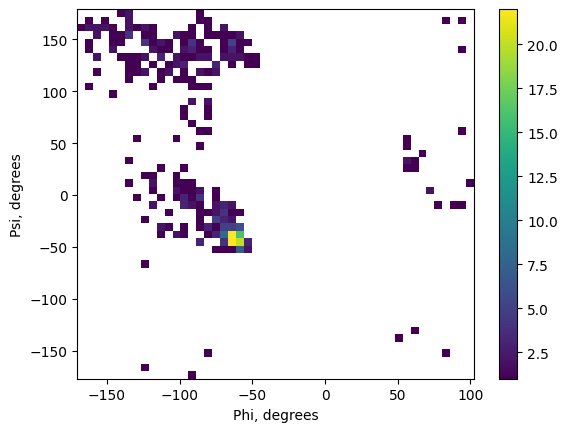

In [19]:
plt.hist2d(phi, psi, bins=50, cmin=1)
plt.xlabel('Phi, degrees')
plt.ylabel('Psi, degrees')
plt.colorbar();

The `hexbin()` function in its basic form is just like the `plt.hist2d()` function except that the binds are hexagons instead of rectangles. Which to use depends upon personal preference.

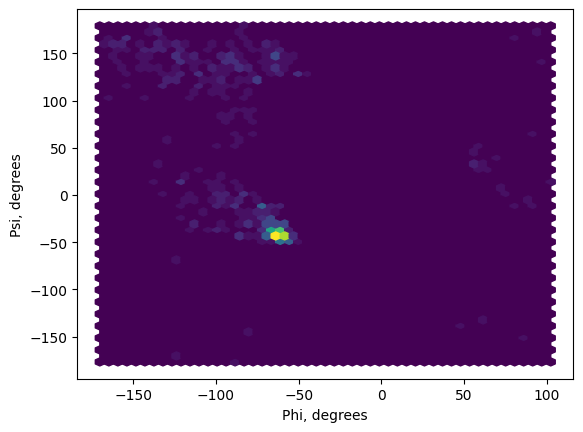

In [20]:
plt.hexbin(phi, psi, gridsize=50)
plt.xlabel('Phi, degrees')
plt.ylabel('Psi, degrees');

(3.7.2)=
### Contour Plots

We will next look at contour plots which show the $z$ values using color or lines. When lines are used, this is similar to a topographic map where the closer the lines, the steeper the change in $z$ values. The lines are also colored to show the values. Like plotting 3D surfaces in [section 3.6](3.6), the data may be represented as either three grids or a series of $xyz$ values. 

````{margin}
```{tip}
Oftentimes if the function name begins with "tri", the function accepts $xys$ values. 
```
````

For our gridded example, we will again visualize our standing wave function from [sections 3.6](3.6). The `plt.contour()` plot accepts x, y, and z grids as the required arguments, but it can also accept the number of levels (`levels=`) and the colormap (`cmap=`).

In [6]:
L = 1
nx = 2
ny = 1

x = np.linspace(0, L, 20)
y = np.linspace(0, L, 20)
X, Y = np.meshgrid(x,y)

def wave(x, y):
    psi = (2/L) * np.sin(nx*np.pi*X/L) * np.sin(ny*np.pi*Y/L)
    return psi

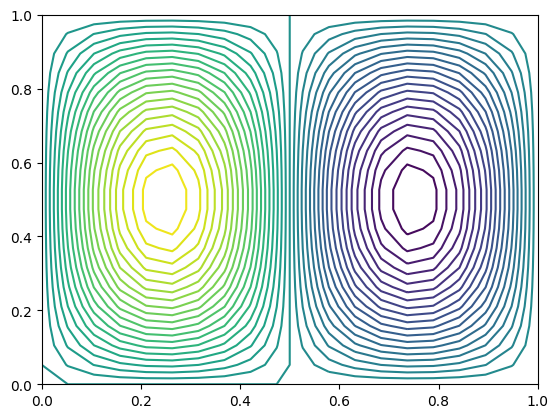

In [7]:
plt.contour(X, Y, wave(X, Y), cmap='viridis', levels=40)

We can also generate a contour plot where the space between the lines is filled using the `plt.contourf()` function. The "f" is for "filled".

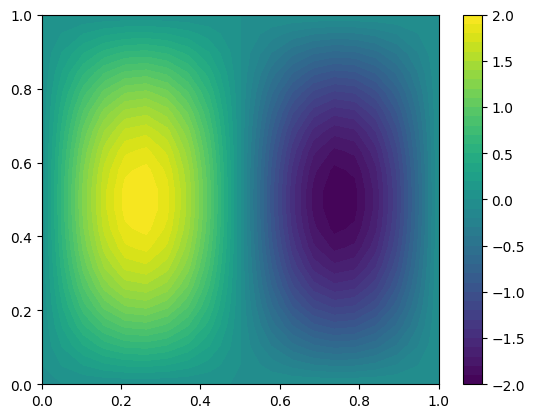

In [8]:
plt.contourf(X, Y, wave(X, Y), cmap='viridis', levels=40)
plt.colorbar()

If the data is in $xyz$ coordinate format, we will instead use the `tricontour()` or `tricontourf()` functions as demonstrated below with COSY NMR data of quinine.

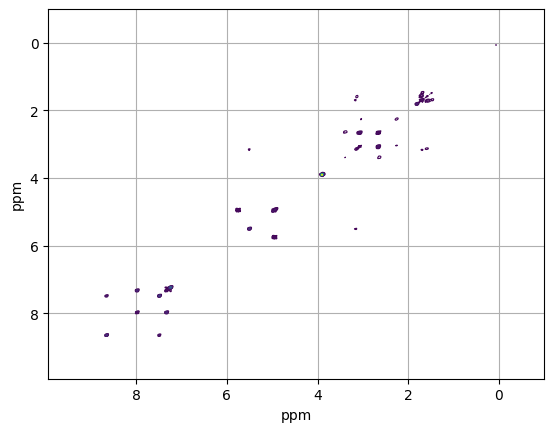

In [21]:
COSY = np.genfromtxt('data/Quinine_CDCl3_COSY.txt', skip_header=2)
x, y, z = COSY[:,0], COSY[:,1], COSY[:,2]

plt.tricontour(x, y, z, levels=100, linewidths=0.8)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('ppm')
plt.ylabel('ppm')
plt.grid(which='major')

Text(0, 0.5, 'ppm')

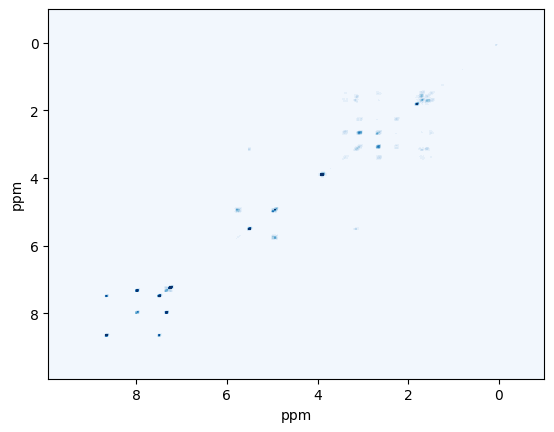

In [22]:
plt.tricontourf(x, y, z, levels=200, vmax=0.1, cmap='Blues')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('ppm')
plt.ylabel('ppm')

As a final example, it is possible to merge a contour plot with a line plot. This is useful for representing 2D NMR spectra such as COSY NMR where the COSY NMR data is represented by the contour plot while the $^1$H NMR spectrum is located on the margins of the contour plot.

In [26]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_2d_contour(main, marg, limits=None, levels=50, linewidths=1.0, grayscale=False):
    '''Generates a 2D plot with 1D marginal plots running along the axes.

    Parameters
    ----------

    main: array-like, shape (1,3)
        xyz values for contour plot
        
    marg: array-like, shape (1,2)
        xy values for marginal plots

    limits: array-like, shape (1,2)
        max and min values

    levels: integer
        contour levels

    linewidths: float
        linewidths for contour and marginal plots

    grayscale: boolean
        all lines are grayscale or black if True
    
    '''

    x_main, y_main, z_main = main
    x_axis, y_axis = marg

    if grayscale:
        cmap = 'Greys_r'
        color = 'k'
    else:
        cmap = 'viridis'
        color = 'C0'

    # generate main contour plot
    fig, ax_main = plt.subplots(figsize=(12,12))
    ax_main.tricontour(x_main, y_main, z_main, levels=levels, linewidths=linewidths, cmap=cmap)
    ax_main.grid()
    ax_main.set_xlabel('ppm')
    ax_main.set_ylabel('ppm')

    if limits == None:    
        ax_main.invert_xaxis()
        ax_main.invert_yaxis()
    else:    
        ax_main.set_ylim(*limits)
        ax_main.set_xlim(*limits)
    
    # generate marginal plots along the axes
    divider = make_axes_locatable(ax_main)
    
    ax_margx = divider.append_axes('top', 2, pad=0.1 , sharex=ax_main)
    ax_margy = divider.append_axes('right', 2, pad=0.1 , sharey=ax_main)
    
    ax_margx.plot(x_axis, y_axis, linewidth=linewidths, color=color)
    ax_margy.plot(y_axis, x_axis, linewidth=linewidths, color=color)
    
    # disable boxes and axes on marginal plots
    ax_margx.axis('off')
    ax_margy.axis('off') 

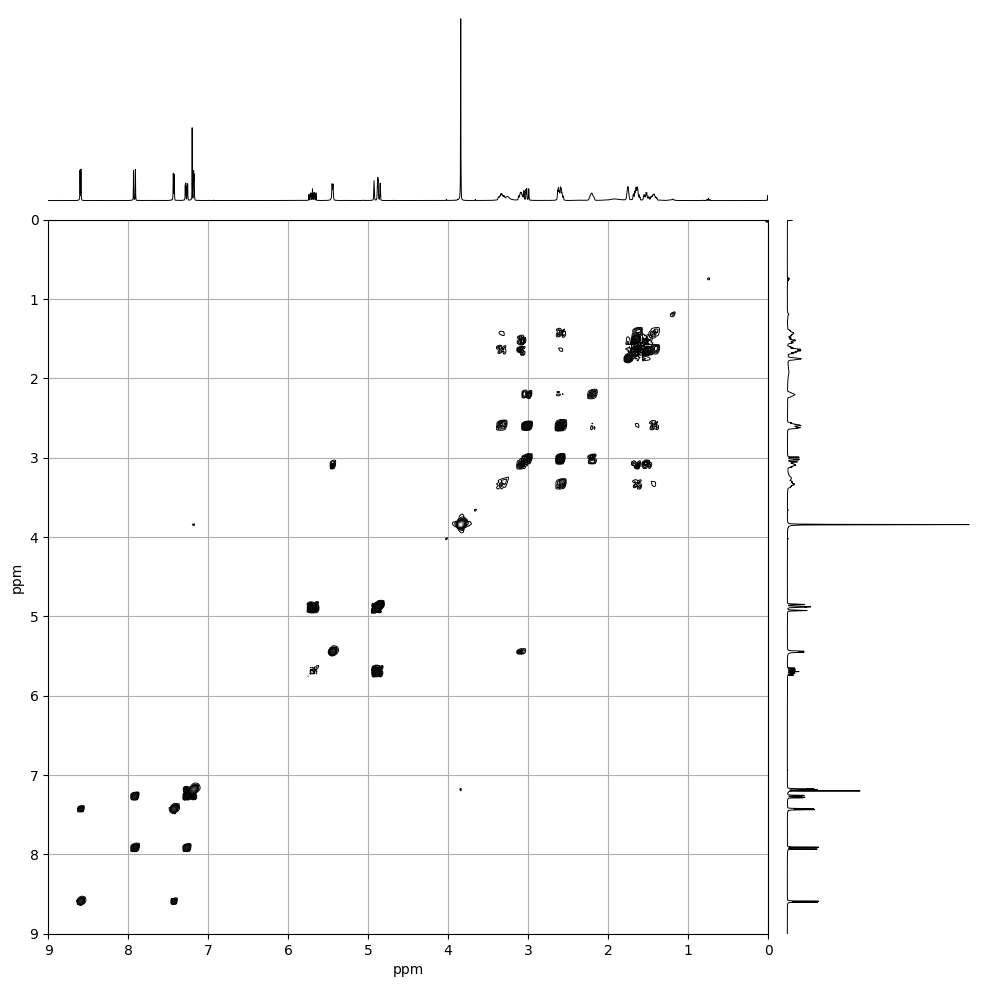

In [29]:
proton = np.genfromtxt('data/Quinine_CDCl3_1HNMR.csv', delimiter=',', skip_header=1)
cosy = np.genfromtxt('data/Quinine_CDCl3_COSY.csv', delimiter=',', skip_header=1)

plot_2d_contour((cosy[:,0], cosy[:,1], cosy[:,2]), (proton[:,0], proton[:,1]), 
                limits=(9,0), levels=300, linewidths=0.7, grayscale=True)